# Homework 1 - Motion Pictures of 1D Phenomena
Gabriel Fior

In this homework we had to implement an algorithm for solving the Schroedinger equation in 1D, following the paper given as reference.
We had to use that algorithm to investigate different use cases, as you can see in the generated videos afterwards.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In accordance to the paper, I started with the initial conditions below.

In [3]:
#initial conditions
L=1.
x0=L/4.
sigma=L/20.
epsilon = 1.e-3
delta = 2*epsilon*epsilon
k0 = 50.*np.pi
lambda1 = 2.*epsilon*epsilon/delta
x = np.arange(0,L,epsilon)

Below I create 2 potentials (V and V2), for the 2 use cases asked for in the homework. 

V is just a normal potential barrier (which I varied the width, as can be seen in the attached movie).

V2 is a barrier followed by a well.

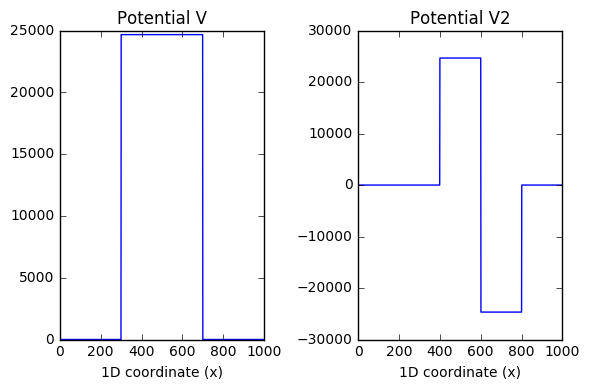

In [43]:
#create potential barrier
V = np.zeros((len(x)))

#create triangular barrier
V2 = np.zeros((len(x)))

width = 0.4 #width of the barrier
initial_x_pos = 0.3 #left border
V0 =  2*(50*np.pi)**2 /2. #height of potential

for i,j in enumerate(x):
    if j>= initial_x_pos and j<=(initial_x_pos+width):
        V[i] = V0
for i,j in enumerate(x):
    count1=0
    if j>= 0.4 and j<=(0.4+width/2):
        V2[i] = V0
    elif j> (0.4+width/2) and j<=(0.4+width):
        V2[i] = -V0
   
plt.figure(1)
plt.subplot(121)
plt.plot(V)
plt.title('Potential V')
plt.xlabel('1D coordinate (x)')
plt.subplot(122)
plt.plot(V2)
plt.title('Potential V2')
plt.xlabel('1D coordinate (x)')
plt.tight_layout()
plt.show()

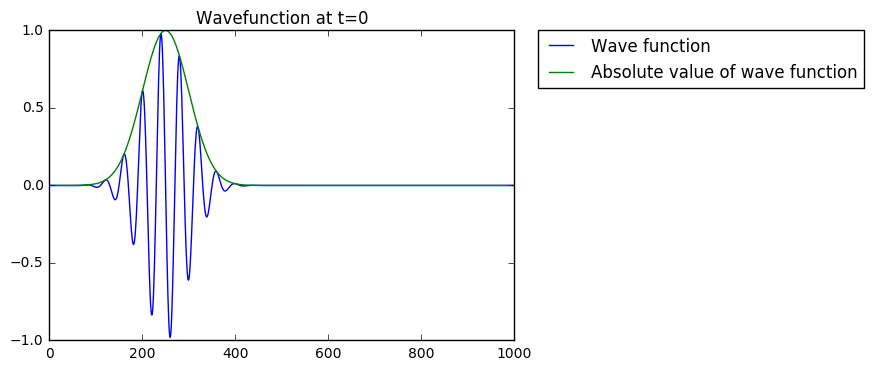

In [39]:
#create initial wave function
psi = np.zeros(len(x),dtype=complex)
#print psi.shape
for i,j in enumerate(x):
    psi[i] = np.exp(1j*k0*j)*np.exp(-1.*(j-x0)*(j-x0)/(2*sigma*sigma))

plt.plot(psi,label='Wave function')
plt.title('Wavefunction at t=0')
plt.plot(np.abs(psi),label='Absolute value of wave function')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Below we create the functions $e$ and $f$, which I used in the propagation iteration. They are used to determine omega, which is an additional function to finally calculate $\phi$ at each time step and each position

In [44]:
#create e function
e = np.zeros(len(x),dtype=complex)
#setting first term
e[0] = 2.+epsilon*epsilon*V2[0] - 1j*lambda1

for i in range(len(x)-1):
    e[i+1] = 2. + epsilon*epsilon*V2[i+1]-1j*lambda1 - 1/(e[i])

#create initial omega and f
omega = np.zeros(len(x),dtype=complex)
f = np.zeros(len(x),dtype=complex)


Here is where the main loop takes place. For every step, the function $\omega$ is updated, which in turn is used to update $f$, which is then together with $e$ used to update $\psi$. In the end, I store the wave functions every 5 steps.

In [49]:
#for loop
niters = 1200
store_each = 5
list_psis=[]

for niter in range(niters):

    for i in range(len(x)-2):
        omega[i+1] =  -1.*psi[i+2] + (1.j*lambda1 + epsilon*epsilon*V2[i+1] + 2.)*psi[i+1] - psi[i]
    
    #create function f
    for i in range(len(x)-2):
        f[0] = omega[0]
        f[1] = omega[1]
        f[i+2] = omega[i+2] + (f[i+1])/(e[i+1])

    psi[-2] = -1.*f[-2]
        
    #update psi
    for i in range(len(x)-1):
        psi[-i-2] = (psi[-i-1] - f[-i-2])/e[-i-2]

    psi[0] = 0.
    psi[-1] = 0.
    probab = np.abs(psi)
    #print probab.max(),probab.min(),probab.mean(), probab.shape
    if niter%store_each==0:
        list_psis.append(probab)

            


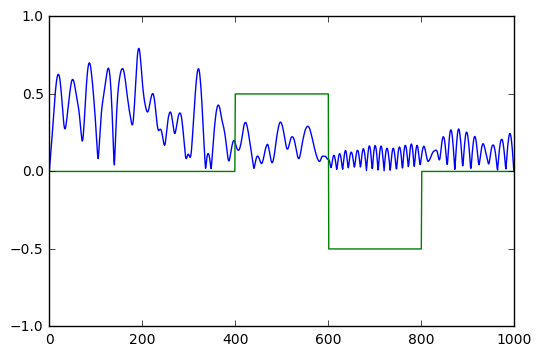

In [50]:
plt.figure(1)
for i,j in enumerate(list_psis):
    #print i
    plt.clf()
    plt.plot(j)
    plt.ylim([-1.0,1.0])
    plt.plot(V2/(2*V0))
    plt.savefig(os.getcwd()+'/images/'+'image%05d.png'%(i))
plt.show()

# Explanation about results

As part of homework 1, you can find 3 movies, namely

1. large_well.mpeg & very_thin_well.mpeg
2. barrier_and_well.mpeg

For movie 1, the main difference that we can see is that, with increasing thickness of the barrier, the reflected wave's amplitude increases and the transmitted wave's amplitude decreases. That is exactly what we expected, since the transmission coefficient $T$ exponentially decays with the barrier width

For movie 2, the results are not so easy to interpret. I started with the wave function only non-zero on the left side (before the barrier). Then, it gets transmitted and reflected by the barrier, and some part of the wavefunction gets again transmitted and reflected by the well, originating some kind of oscillation in resonance.